<h1 align="center">Bayesian Statistics, Demo 3</h1>

<br>

In [1]:
import pymc as pm
import numpy as np
import pandas as pd
import seaborn
import math
import arviz as az
import bambi as bmb
import matplotlib.pyplot as plt

<h3 align="left">Task 1</h3>

Let us assume that the posterior distribution for an unknown variable $\, \theta \,$ is obtained as

\begin{equation*}
    p(\theta | y) = \frac{1}{2} \theta^2 e^{- \theta}, \quad \theta > 0,
\end{equation*}

where y is an observation. Describe this posterior: calculate the expected value, standard deviation, and a 90% symmetric posterior interval.

The given posterior distribution resembles the gamma distribution, which has the following probability density function:

\begin{equation*}
    f(x) = \frac{\lambda^{k}}{\Gamma(k)} \theta^{k-1} e^{- \lambda \theta},
\end{equation*}

where $\, \theta > 0, \,$ k is the shape parameter and $\, \lambda \,$ is the rate parameter.

In our case, one can see that if k=3 and $\, \lambda \,$=1, then

\begin{align*}
    f(x) = \frac{\lambda^{3}}{\Gamma(3)} \theta^{3-1} e^{-1\theta} = \frac{1}{2} \theta^2 e^{- \theta},
\end{align*}

which is the given posterior distribution.

For a gamma distribution with a shape parameter **k** and a rate parameter $\, \boldsymbol{\lambda}, \,$ the mean (or expected value) and the standard deviation are given by:

\begin{equation*}
    E(\theta) = \frac{k}{\lambda}.
\end{equation*}

\begin{align*}
    \sigma_{\theta} = \sqrt{Var(\theta)} = \sqrt{\frac{k}{\lambda^{2}}}.
\end{align*}

In [1]:
k = 3
lam = 1

In [2]:
# Expected value
k/lam

3.0

In [5]:
# Standard deviation
np.sqrt(k/lam**2)

1.7320508075688772

In [7]:
# Symmetric 90% posterior interval

# Create a random gamma(3, 1) distributed data.
# (Note that the scale parameter is defined as 1/rate).
rand_gam = np.random.gamma(shape=k, scale=1/lam, size=10000)

posterior_interval = np.quantile(rand_gam, [0.05, 0.95])

PI_table = pd.DataFrame({"5%": [posterior_interval[0]],
                         "95%": [posterior_interval[1]]})

PI_table

,5%,95%
0,0.827619,6.204382


<br>

<br>

<h3 align="left">Task 2</h3>

Let  $\, y_i|\mu \sim N(\mu, 4). \,$ Let it also be known that $\, \mu \sim  N(8, 9) \,$ is the prior distribution of the expected value. \
A sample of $\, n=9 \,$ is observed:

$$ 18.36 \quad 16.17 \quad 10.21 \quad 11.07 \quad 18.32 \quad 6.03 \quad 18.42 \quad 8.04 \quad 13.53,$$

where $\, \bar{y} = 13.35. \,$ Determine the posterior distribution $\, p(\mu | y) \,$ and the 95% symmetric posterior interval for $\, \mu. \,$


A normally distributed likelihood function with a known variance, when combined with a normally distributed prior distribution, results in a normally distributed posterior distribution. This relationship arises from the theory of conjugate priors, according to which if the prior distribution is part of the exponential family, then the posterior distribution will also be from the same distribution as the prior distribution.

One can infer from the theory of conjugate priors that since the likelihood $\, p(y|\mu) \sim N(\mu, 4) \,$ and $\, p(\mu) \sim N(8, 9) \,$ (and since the values $\, y_i = (y_1,...,y_9) \,$ and the standard deviation $\, \sigma = 2 \,$ are known), that the posterior distribution will be from a normal distribution.

In a general case, where $\, y = (y_i,...,y_n), \,$ $\, y_i | \mu \sim N(\mu, \sigma^2) \,$ and where the standard deviation $\, \sigma \,$ is known, the conditional joint probability distribution for the observations $\, y_i  \,$(i.e. the likelihood function) is:

\begin{equation*}
    p(y|\mu) = \left(\frac{1}{2 \pi \sigma^2} \right)^{\frac{n}{2}} exp\left[-\frac{1}{2 \sigma^2} \sum\limits_{i=1}^{n} (y_i -\mu)^2 \right].
\end{equation*}

Then, when choosing $\, \mu \sim N(\mu_{0}, \sigma_{0}^{2}) \,$ as the prior, it becomes evident that by using the Bayes' formula, the posterior distribution is

\begin{equation*}
    p(\mu|y) \propto p(\mu) p(y|\mu) \propto exp\left[-\frac{1}{2} \left(\frac{1}{\sigma^2_0} + \frac{n}{\sigma^2} \right) \left(\mu - \frac{\frac{\mu_0}{\sigma^2_0} + \frac{n \bar{y}}{\sigma^2}}{\frac{1}{\sigma^2_0} + \frac{n}{\sigma^2}} \right)^2 \right], 
\end{equation*}

where $\, \bar{y} \,$ is the sample mean of y. It is now clear that the posterior distribution of $\, \mu \,$ is a normal distribution with an expected value of

\begin{equation*}
    \frac{\frac{1}{\sigma^2_0} \mu_0 + \frac{n}{\sigma^2}\bar{y}}{\frac{1}{\sigma^2_0} + \frac{n}{\sigma^2}} 
\end{equation*}

and a variance of

\begin{equation*}
    \frac{1}{\frac{1}{\sigma^2_0} + \frac{n}{\sigma^2}}.
\end{equation*}

<br>

Now, since $\, p(y|\mu) \sim N(\mu, 4) \,$ and $\, p(\mu) \sim N(8, 9), \,$ the posterior distribution is:

\begin{align*}
    p(\mu | y) &\propto p(\mu) p(y|\mu) \\
    &\propto exp \left[-\frac{1}{2} \left(\frac{1}{9} + \frac{9}{4} \right) \left(\mu - \frac{\frac{8}{9} + \frac{9 \cdot 13.35}{4}}{\frac{1}{9} + \frac{9}{4}} \right)^2 \right] \\
    &\propto exp \left[-\frac{1}{2} (2.361) \, (\mu - 13.098)^2 \right]
\end{align*}

$\boldsymbol{\rightarrow} p(\mu|y) \sim N(13.098, 0.424) \,$ is the posterior distribution.

In [81]:
# 95% symmetric posterior interval for mu
y_obs = np.array([18.36, 16.17,  10.21, 11.07, 18.32, 6.03, 18.42, 8.04, 13.53])
PI95 = np.quantile(y, [0.025, 0.975])
PI95_table = pd.DataFrame({"2.5%": [PI95[0]],
                           "97.5": [PI95[1]]})
PI95_table

,2.5%,97.5
0,6.432,18.408


<br>

<br>

<h3 align="left">Task 3</h3>

Repeat the analysis conducted in task 2 with a library of your choice.

Let  $\, y_i|\mu \sim N(\mu, 4). \,$ Let it also be known that $\, \mu \sim  N(8, 9) \,$ is the prior distribution of the expected value.

In [91]:
obs_y = np.array([18.36, 16.17,  10.21, 11.07, 18.32, 6.03, 18.42, 8.04, 13.53])

In [92]:
with pm.Model() as model:
    
    # Prior for mu
    mu = pm.Normal("mu", mu=8, sigma=np.sqrt(9))
    
    # Likelihood (assuming normal likelihood).
    # In a Bayesian model, the likelihood represents \
    # the probability of observing the given data (obs_y) \
    # given the (prior) parameters of the model (mu).
    likelihood = pm.Normal("y", mu=mu, sigma=np.sqrt(4), observed=obs_y) 
    
    # Sample from the posterior
    # The draw parameter specifies the number of samples to draw.
    # The tune parameter specifies the number of iterations in the tuning phase.
    trace = pm.sample(draws=2000, tune=1000)
    
# Generate posterior predictive samples
posterior_pred = pm.sample_posterior_predictive(trace=trace, model=model)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 15 seconds.
Sampling: [y]


In [93]:
# Shape of the resulting array containing posterior predictions for the expected value mu
posterior_pred["posterior_predictive"]["y"].values.shape

(4, 2000, 9)

In [94]:
# Size of the array
posterior_pred["posterior_predictive"]["y"].values.size

72000

In [95]:
# Expected value of mu
np.mean(posterior_pred["posterior_predictive"]["y"].values)

13.101438899989883

In [96]:
# Variance of mu
np.var(posterior_pred["posterior_predictive"]["y"].values)

4.419036528608577

In [98]:
# 95 % symmetric posterior interval for mu
np.quantile(posterior_pred["posterior_predictive"]["y"].values, [0.025, 0.975])

array([ 8.96815818, 17.21448258])

According to the bayesian inference, the posterior distribution $\, p(\mu|y) \sim N(13.1, 4.4). \,$ 

<br>

<br>

<h3 align="left">Task 4</h3>

Assume that the following data has been gathered:

$$ y = (3.1, \, 2.2, \, 1.7, \, 0.9, \, 1.5, \, 2.3, \ 0.5, \, 0.1, \, 0.2, \, 0.6, \, 2.1, \, 0.1). $$

We know that the actual data-generating process produces only positive observations, and therefore we end up trying a Gamma distribution for the dataset, using a log-link for the expected value. Fit the model using a library of your choice and report the results.

In [99]:
obs_y = np.array([3.1, 2.2, 1.7, 0.9, 1.5, 2.3, 0.5, 0.1, 0.2, 0.6, 2.1, 0.1])

In [110]:
with pm.Model() as model1:
    
    # Parameters for the Gamma distribution.
    # The Half-Cauchy distribution is a continuous probability distribution,
    # and is a variant of the Cauchy distribution. 
    # It is defined only for non-negative values, 
    # making it suitable for use as a prior for positive parameters.
    # Note that for pm.HalfCauchy, 'beta' is the scale parameter (>0).
    alpha = pm.HalfCauchy("alpha", beta=10)
    beta = pm.HalfCauchy("beta", beta=10)
    
    # Likelihood (Gamma distribution with log-link).
    y = pm.Gamma("y", alpha=alpha, beta=beta, observed=obs_y)
    
    #  Sample from the posterior 
    trace = pm.sample(draws=2000, tune=1000)
    
pm.summary(trace)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 16 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,1.353,0.444,0.613,2.216,0.01,0.007,1896.0,2505.0,1.0
beta,1.125,0.446,0.331,1.937,0.01,0.007,1912.0,2622.0,1.0


- mean: the mean of the posterior distribution for each parameter.


- sd: the standard deviation of the posterior distribution for each parameter.


- hdi_3%: The 3rd percentile of the HDI (highest density interval), representing the lower bound of the interval. This is the value below which 3% of the posterior distribution lies.


- hdi_97%: The 97th percentile of the HDI, representing the upper bound of the interval. This is the value below which 97% of the posterior distribution lies.


- mcse_mean: the estimated standard error of the mean of the posterior distribution.


- mcse_sd: the estimated standard error of the standard deviation of the posterior distribution.


- ess_bulk: the effective sample size for bulk computations, which is a measure of how many independent samples are effectively captured by the trace.


- ess_tail: the effective sample size for tail computations, another measure of effective samples.


- r_hat: The potential scale reduction factor. It assesses the convergence of the Markov chain: values close to 1 suggest convergence.

- https://www.pymc.io/projects/docs/en/stable/api/distributions/generated/pymc.Gamma.html
- https://www.pymc.io/projects/docs/en/latest/api/distributions/generated/pymc.HalfCauchy.html

<br>

<br>

<h3 align="left">Task 6</h3>

Let us examine the PISA data set and fit a Bayesian model to the data.

The data set contains the following variables:

- mpist: test score (mathematics)
- sukup: gender
- SES: sosioeconomic status
- koulusij: school location (urban or rural)
- koulualue: school region (Northern, Eastern, Southern, or Western Finland)
- matem: previous mathematics grade
- aidink: previous native language grade

Fit a linear regression model to the data, where the test score (mathematics) is explained by the student's background factors. The formula for the model should be as follows:

\begin{align*}
    mpist_i &= \beta_0 \, + \, \beta_1 matem_i \, + \, \beta_2I(sukup_i = tytto) \, + \, \beta_3I(koulusij_i = maaseutu) \\
    &+ \beta_4I(koulualue_i = Ita\text{-}Suomi) \, + \, \beta_5(koulualue_i = Lansi\text{-}Suomi) \\
    &+ \beta_6I(koulualue_i = Pohjois\text{-}Suomi) \, + \, \epsilon_i,
\end{align*}

$$ \epsilon_i \sim N(0, \sigma^2), \quad i=1,...,n, $$

where $\, I(c) \,$ is an indicator variable that takes the value 1 when condition c is true and 0 otherwise. Fit the model with a package of your choice and report the posterior means, standard deviations, and 95% posterior intervals of the model parameters.

In [2]:
pisa = pd.read_csv("C:/Users/testi/Desktop/Bayesian-Statistics-1/aineistot/pisa.csv", index_col=0)

In [3]:
pisa.head()

,mpist,sukup,SES,koulusij,koulualue,matem,aidink
107,569.254,poika,0.1322,kaupunki,Etela-Suomi,9,7
1261,631.804,poika,1.1144,kaupunki,Etela-Suomi,8,8
381,521.582,tytto,0.4400,kaupunki,Etela-Suomi,7,9
721,560.686,tytto,0.9037,kaupunki,Etela-Suomi,8,8
2447,312.048,tytto,0.0085,kaupunki,Lansi-Suomi,6,9


In [4]:
pisa.shape

(200, 7)

In [5]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 107 to 3445
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mpist      200 non-null    float64
 1   sukup      200 non-null    object 
 2   SES        200 non-null    float64
 3   koulusij   200 non-null    object 
 4   koulualue  200 non-null    object 
 5   matem      200 non-null    int64  
 6   aidink     200 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 12.5+ KB


In [34]:
# The response variable 
obs_y = pisa["mpist"].values

In [ ]:
# Let's create the explanatory variables for the linear regression
X1 = pisa["matem"].values
X2 = np.where(pisa["sukup"] == "tytto", 1, 0)
X3 = np.where(pisa["koulusij"] == "maaseutu", 1, 0)
X4 = np.where(pisa["koulualue"] == "Ita-Suomi", 1, 0)
X5 = np.where(pisa["koulualue"] == "Lansi-Suomi", 1, 0)
X6 = np.where(pisa["koulualue"] == "Pohjois-Suomi", 1, 0)

In [27]:
# Let's create a dataframe (this is going to be used in the Bayesian sampling)
df = pd.DataFrame({"Math_score": obs_y,
                  "Matem": X1,
                  "Girl": X2,
                  "Rural": X3,
                  "Eastern_Finland": X4,
                  "Western_Finland": X5,
                  "Northern_Finland": X6})

In [16]:
# Create the Bayesian model
model = bmb.Model("Math_score ~ Matem + Girl + Eastern_Finland + Western_Finland + Northern_Finland",
                  data=df)

# Fit the Bayesian model
fitted = model.fit(draws=2000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Math_score_sigma, Intercept, Matem, Girl, Eastern_Finland, Western_Finland, Northern_Finland]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 20 seconds.


In [29]:
pm.summary(fitted)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,335.163,24.789,288.045,380.773,0.252,0.178,9710.0,6906.0,1.0
Matem,30.121,3.288,24.117,36.501,0.035,0.025,8660.0,6390.0,1.0
Girl,-16.953,8.954,-34.016,-0.658,0.091,0.073,9544.0,6401.0,1.0
Eastern_Finland,1.316,14.726,-27.458,27.834,0.156,0.153,8882.0,6516.0,1.0
Western_Finland,-29.989,10.830,-50.719,-10.345,0.115,0.082,8901.0,6214.0,1.0
Northern_Finland,-10.958,14.723,-38.156,17.152,0.166,0.133,7871.0,6227.0,1.0
Math_score_sigma,63.736,3.236,58.090,70.092,0.035,0.025,8450.0,6585.0,1.0


In [50]:
# Let's see how these beta coefficients match with the same coefficients obtained by \
# using the statsmodels library
from statsmodels.formula.api import ols

m = ols("Math_score ~ Matem + Girl + Eastern_Finland + Western_Finland + Northern_Finland",
                  data=df).fit()

m.params

Intercept           334.979599
Matem                30.128378
Girl                -16.837591
Eastern_Finland       1.795520
Western_Finland     -29.939956
Northern_Finland    -10.648681
dtype: float64

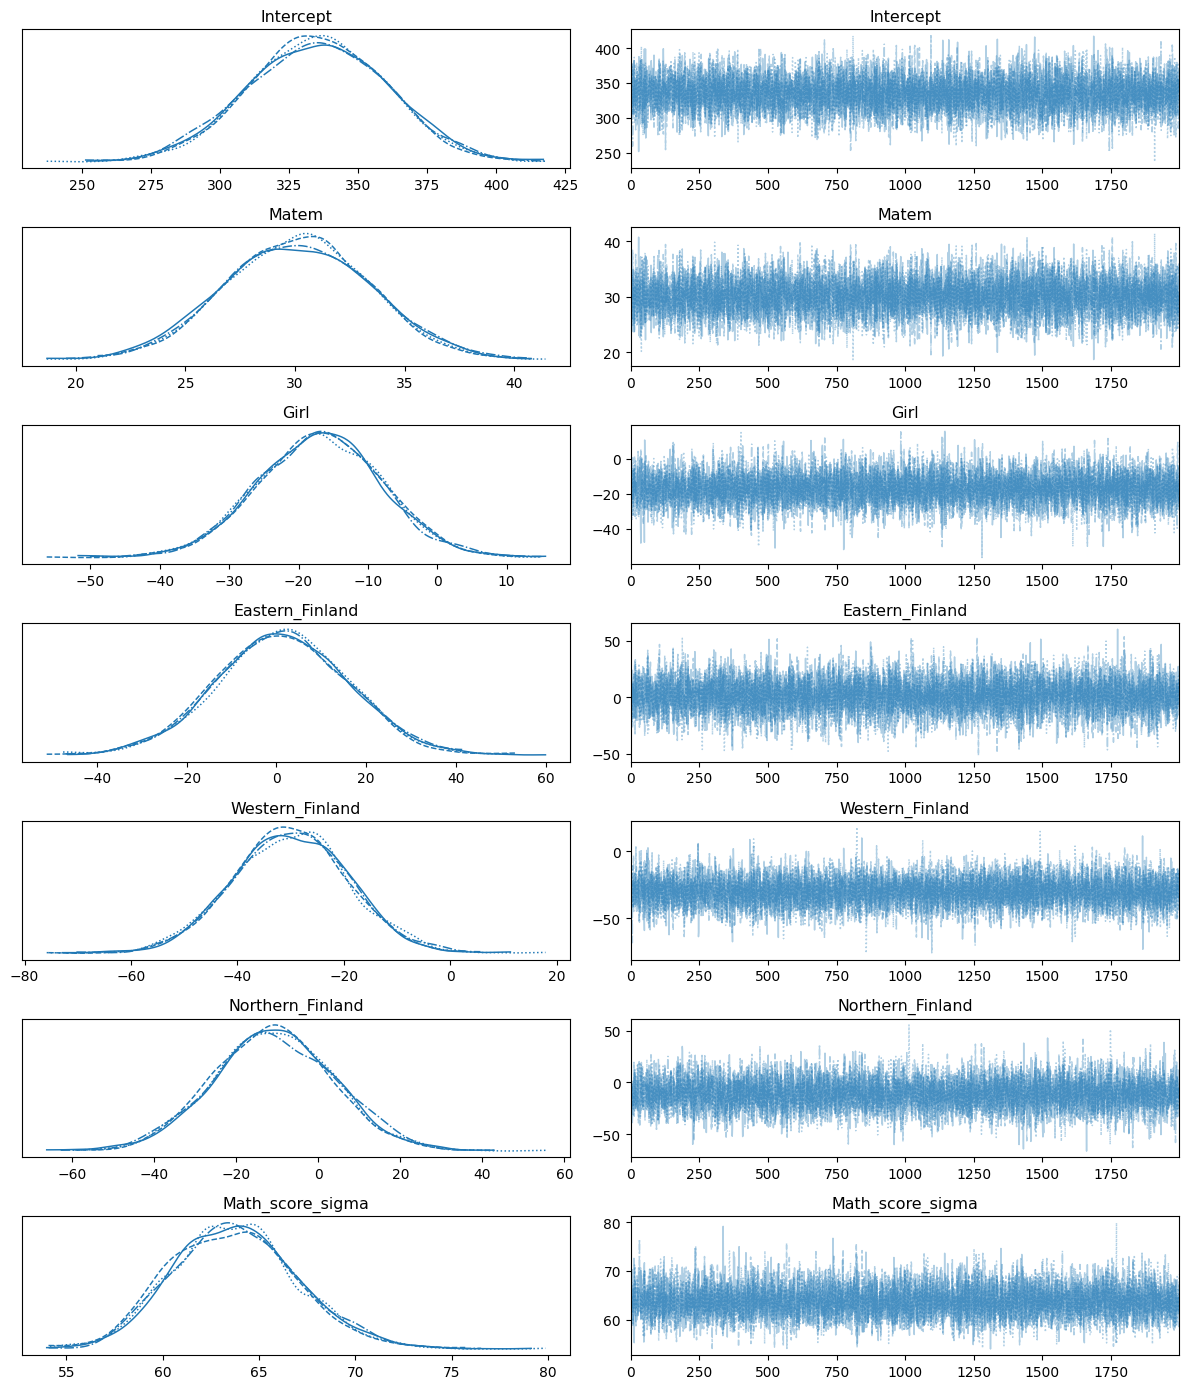

In [56]:
# Let's visualize the trace plots of the parameters obtained from the Bayesian inference.
# The trace plot shows the sampled values of a parameter (or parameters) \
# over the course of the sampling process (iterations / draws).
az.plot_trace(fitted)
plt.tight_layout();

- Note that in the context of Bayesian inference and Markov chain Monte Carlo (MCMC) methods, a "trace" refers to the sequence of parameter values sampled during the MCMC simulation. Each parameter being estimated in the Bayesian model has its own trace, which is essentially a record of the values that the parameter takes on at each iteration of the MCMC process.